<a href="https://colab.research.google.com/github/DivyamThapliyal07/Projects/blob/main/AI_Financial_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("/content/ai_financial_market_daily_realistic_synthetic.csv")

In [3]:
df.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%
0,2015-01-01,OpenAI,5.92,0.63,-36.82,NaN,-0.36
1,2015-01-02,OpenAI,5.41,1.81,80.59,NaN,0.41
2,2015-01-03,OpenAI,4.50,0.61,-38.88,NaN,0.23
3,2015-01-04,OpenAI,5.45,0.95,-5.34,NaN,0.93
4,2015-01-05,OpenAI,3.40,1.48,48.45,NaN,-0.09


In [4]:
np.unique(df["Company"])

array(['Google', 'Meta', 'OpenAI'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10959 entries, 0 to 10958
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 10959 non-null  object 
 1   Company              10959 non-null  object 
 2   R&D_Spending_USD_Mn  10959 non-null  float64
 3   AI_Revenue_USD_Mn    10959 non-null  float64
 4   AI_Revenue_Growth_%  10959 non-null  float64
 5   Event                233 non-null    object 
 6   Stock_Impact_%       10959 non-null  float64
dtypes: float64(4), object(3)
memory usage: 599.4+ KB


In [6]:
df.describe()

,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Stock_Impact_%
count,10959.000000,10959.000000,10959.000000,10959.000000
mean,65.184504,44.126571,159.395988,0.025560
std,47.918247,41.639356,135.462185,0.749513
min,1.570000,-0.550000,-155.430000,-3.000000
25%,8.640000,3.610000,43.870000,-0.500000
50%,70.960000,35.220000,133.750000,0.000000
75%,99.600000,71.680000,258.300000,0.510000
max,163.830000,155.960000,565.500000,18.500000


In [7]:
df.shape

(10959, 7)

In [8]:
from datetime import datetime

In [9]:
df["Date"]= pd.to_datetime(df["Date"])

In [12]:
df["Month"] = df["Date"].dt.month

In [13]:
df["Year"]= df["Date"].dt.year

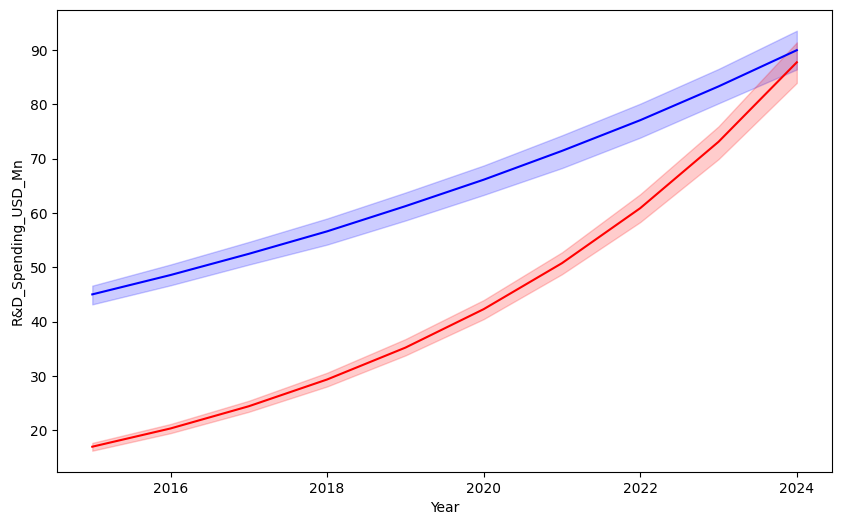

In [15]:
plt.figure(figsize=(10,6))
sns.lineplot(data= df,x="Year", y="R&D_Spending_USD_Mn", color="blue")
sns.lineplot(data= df, x="Year", y="AI_Revenue_USD_Mn", color="red")
plt.show()

In [18]:
companies_r_d= df.groupby("Company")["R&D_Spending_USD_Mn"].sum()

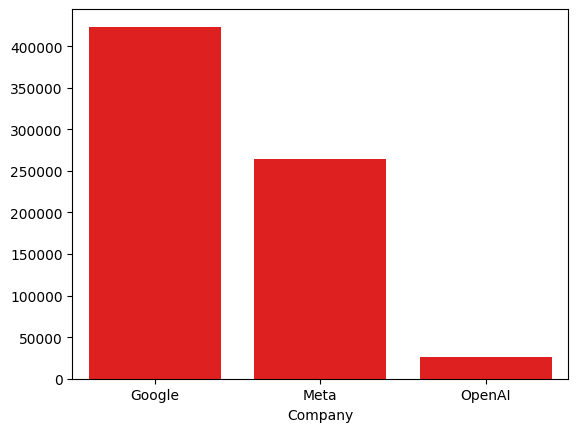

In [19]:
sns.barplot(x=companies_r_d.index, y=companies_r_d.values, color="red")
plt.show()

In [20]:
company_ai_revenue= df.groupby("Company")["AI_Revenue_USD_Mn"].sum()

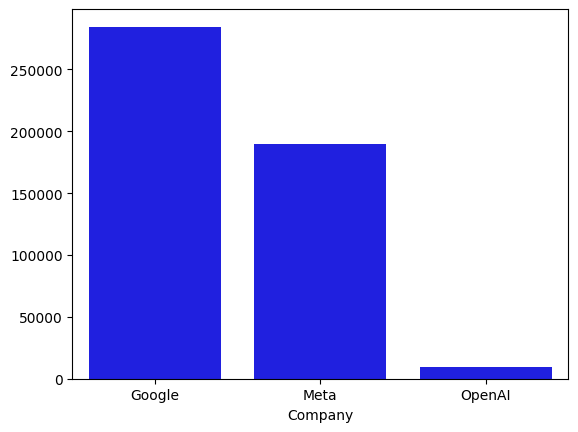

In [22]:
sns.barplot(x= company_ai_revenue.index, y= company_ai_revenue.values, color="blue")
plt.show()

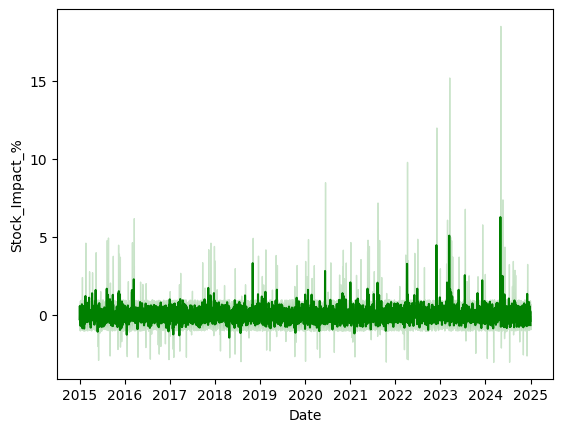

In [26]:
sns.lineplot(data=df, x="Date", y="Stock_Impact_%", color="green")
plt.xlabel("Date")
plt.ylabel("Stock_Impact_%")
plt.show()

In [28]:
df_meta= df[df["Company"]=="Meta"]

In [29]:
df_meta.head()

,Date,Company,R&D_Spending_USD_Mn,AI_Revenue_USD_Mn,AI_Revenue_Growth_%,Event,Stock_Impact_%,Year,Month
7306,2015-01-01,Meta,50.39,18.95,-5.23,NaN,-0.42,2015,1
7307,2015-01-02,Meta,49.80,19.77,-1.16,NaN,0.63,2015,1
7308,2015-01-03,Meta,49.09,19.96,-0.21,NaN,0.73,2015,1
7309,2015-01-04,Meta,50.66,20.48,2.38,NaN,-0.26,2015,1
7310,2015-01-05,Meta,51.36,19.84,-0.80,NaN,-0.37,2015,1


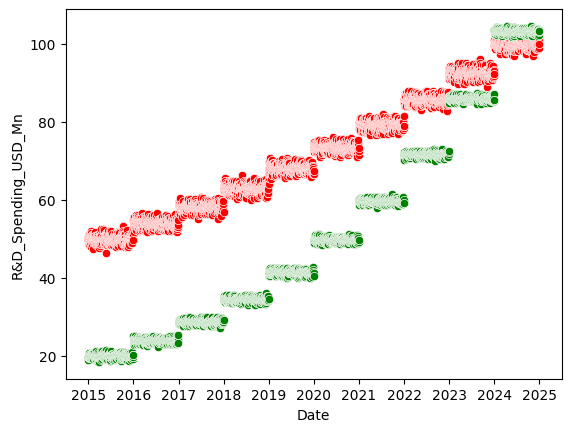

In [31]:
sns.scatterplot(data= df_meta, x="Date", y="R&D_Spending_USD_Mn", color="red")
sns.scatterplot(data=df_meta, x="Date", y="AI_Revenue_USD_Mn", color="green")
plt.show()

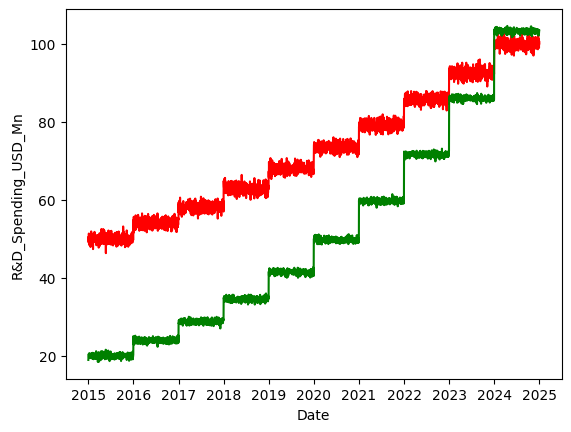

In [32]:
sns.lineplot(data= df_meta, x="Date", y="R&D_Spending_USD_Mn", color="red")
sns.lineplot(data=df_meta, x="Date", y="AI_Revenue_USD_Mn", color="green")
plt.show()

In [33]:
df_google= df[df["Company"]=="Google"]

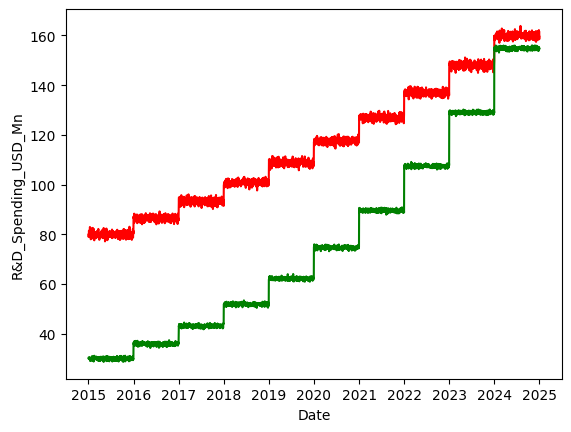

In [34]:
sns.lineplot(data= df_google, x="Date", y="R&D_Spending_USD_Mn", color="red")
sns.lineplot(data=df_google, x="Date", y="AI_Revenue_USD_Mn", color="green")
plt.show()

In [35]:
df_openai= df[df["Company"]=="OpenAI"]

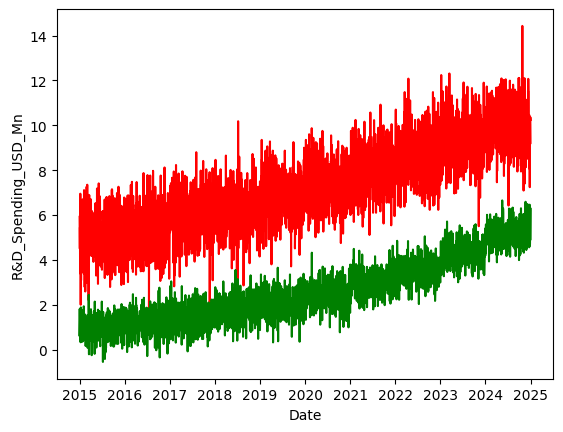

In [37]:
sns.lineplot(data= df_openai, x="Date", y="R&D_Spending_USD_Mn", color="red")
sns.lineplot(data=df_openai, x="Date", y="AI_Revenue_USD_Mn", color="green")
plt.show()

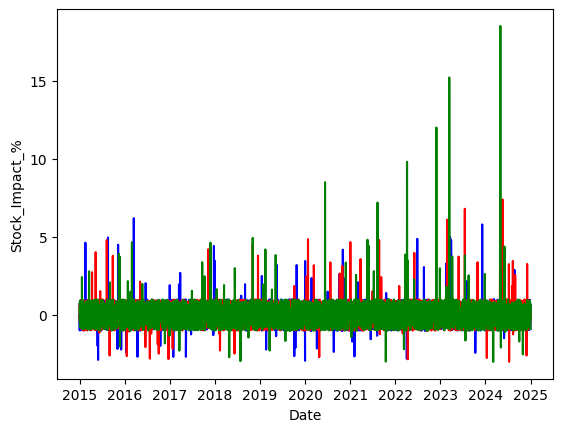

In [38]:
sns.lineplot(data=df_google, x="Date", y="Stock_Impact_%", color="blue")
sns.lineplot(data=df_meta, x="Date", y="Stock_Impact_%", color="red")
sns.lineplot(data=df_openai, x="Date", y="Stock_Impact_%", color="green")
plt.show()

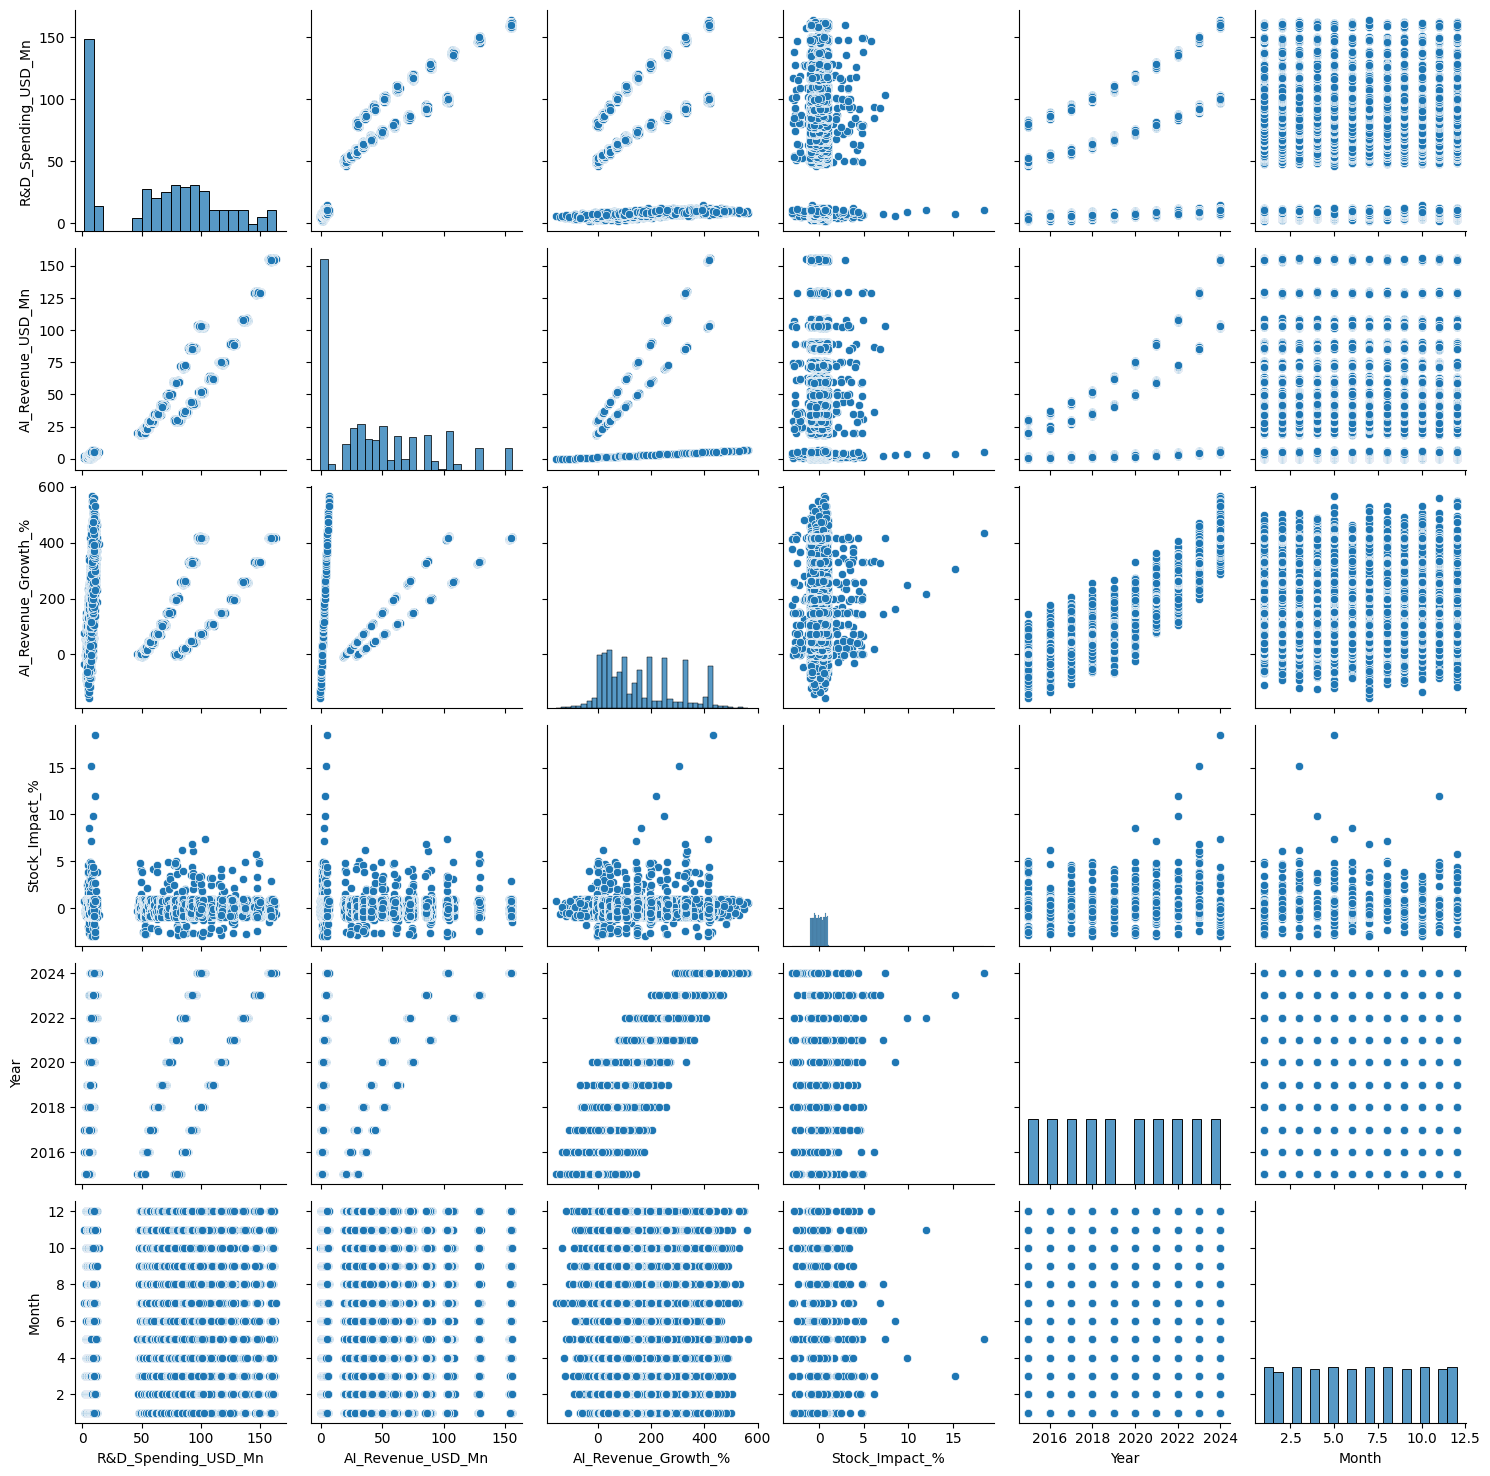

In [39]:
sns.pairplot(df)
plt.show()

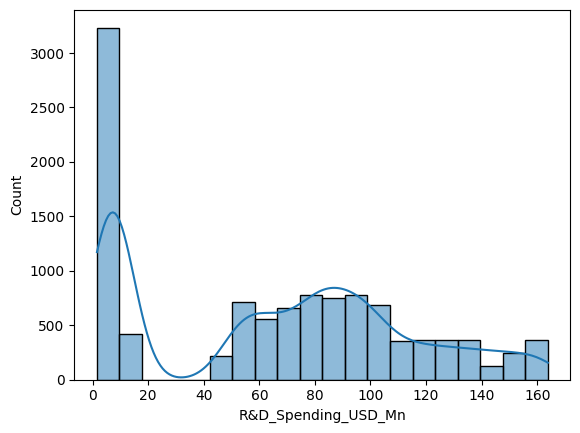

In [40]:
sns.histplot(data=df, x="R&D_Spending_USD_Mn", kde=True)
plt.show()